In [1]:
# clone the repo
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

fatal: destination path 'FastSAM' already exists and is not an empty directory.


In [2]:
# download weights from hugging face
!wget https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt

--2024-01-04 12:02:01--  https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
Resolving huggingface.co (huggingface.co)... 18.238.49.10, 18.238.49.117, 18.238.49.112, ...
Connecting to huggingface.co (huggingface.co)|18.238.49.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/71/c3/71c3ec5a83f3fc374665cec9240f614262e29088fca1a18732571e13c7084f1b/c0be4e7ddbe4c15333d15a859c676d053c486d0a746a3be6a7a9790d52a9b6d7?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27FastSAM.pt%3B+filename%3D%22FastSAM.pt%22%3B&Expires=1704628921&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNDYyODkyMX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy83MS9jMy83MWMzZWM1YTgzZjNmYzM3NDY2NWNlYzkyNDBmNjE0MjYyZTI5MDg4ZmNhMWExODczMjU3MWUxM2M3MDg0ZjFiL2MwYmU0ZTdkZGJlNGMxNTMzM2QxNWE4NTljNjc2ZDA1M2M0ODZkMGE3NDZhM2JlNmE3YTk3OTBkNTJhOWI2ZDc%7EcmVzcG9uc2U

In [3]:
# necessary installations
!pip install -r FastSAM/requirements.txt
!pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 71.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.0/130.0 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 101.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB

In [4]:
# download image
!wget -P images https://scx2.b-cdn.net/gfx/news/2021/dog-and-owner.jpg

--2024-01-04 12:02:51--  https://scx2.b-cdn.net/gfx/news/2021/dog-and-owner.jpg
Resolving scx2.b-cdn.net (scx2.b-cdn.net)... 169.150.236.97, 2400:52e0:1a00::941:1
Connecting to scx2.b-cdn.net (scx2.b-cdn.net)|169.150.236.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221448 (216K) [image/jpeg]
Saving to: ‘images/dog-and-owner.jpg’

dog-and-owner.jpg   100%[===================>] 216.26K  --.-KB/s    in 0.07s   

2024-01-04 12:02:51 (3.22 MB/s) - ‘images/dog-and-owner.jpg’ saved [221448/221448]



In [5]:
# import necessary libraries
import matplotlib.pyplot as plt
import cv2

In [6]:
image = cv2.imread('images/dog-and-owner.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

1280 853


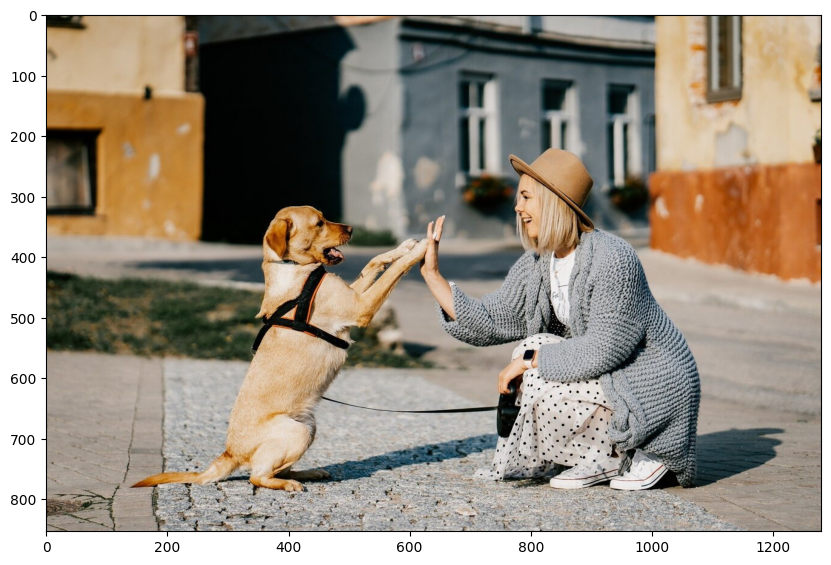

In [7]:
# original image
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.imshow(image)

In [10]:
# Text prompt
!python FastSAM/Inference.py --model_path FastSAM.pt --img_path ./images/dog-and-owner.jpg  --text_prompt "the yellow dog"


0: 704x1024 65 objects, 27.4ms
Speed: 7.7ms preprocess, 27.4ms inference, 5.5ms postprocess per image at shape (1, 3, 1024, 1024)
100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 119MiB/s]


In [8]:
# everything mode
!python FastSAM/Inference.py  --model_path FastSAM.pt --img_path ./images/dog-and-owner.jpg --imgsz 1024


0: 704x1024 65 objects, 28.3ms
Speed: 6.3ms preprocess, 28.3ms inference, 46.5ms postprocess per image at shape (1, 3, 1024, 1024)


1280 852


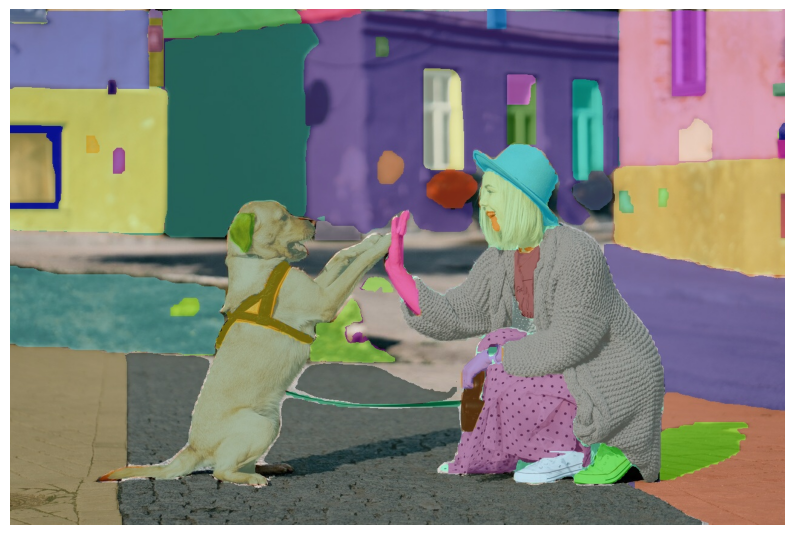

In [9]:
# image visualize
image = cv2.imread('output/dog-and-owner.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)

1280 852


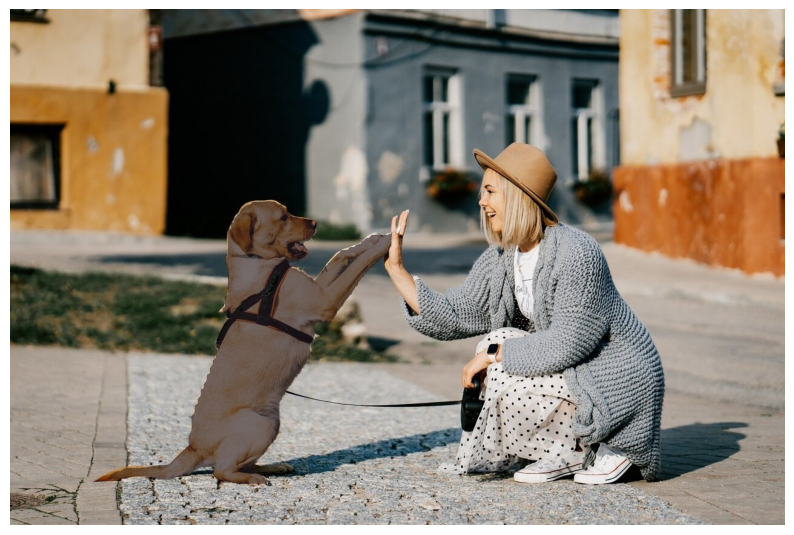

In [11]:
# image visualize
image = cv2.imread('output/dog-and-owner.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)